In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
import pandas as pd

# Using double backslashes
df = pd.read_csv('C:\\Users\\User\\Desktop\\ca\\ca-1-Health-nutrition-recommender-\\nutrition\\dataset.csv')

print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get information about data types and non-null counts


   User ID  Age  Weight Dietary Preferences  Activity Level  Calories Intake
0        1   56      94          vegetarian               1             1535
1        2   69      50      non-vegetarian               1             2184
2        3   46      74               vegan               2             1519
3        4   32      56      non-vegetarian               2             1820
4        5   60      58      non-vegetarian               2             2011
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User ID              100 non-null    int64 
 1   Age                  100 non-null    int64 
 2   Weight               100 non-null    int64 
 3   Dietary Preferences  100 non-null    object
 4   Activity Level       100 non-null    int64 
 5   Calories Intake      100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4

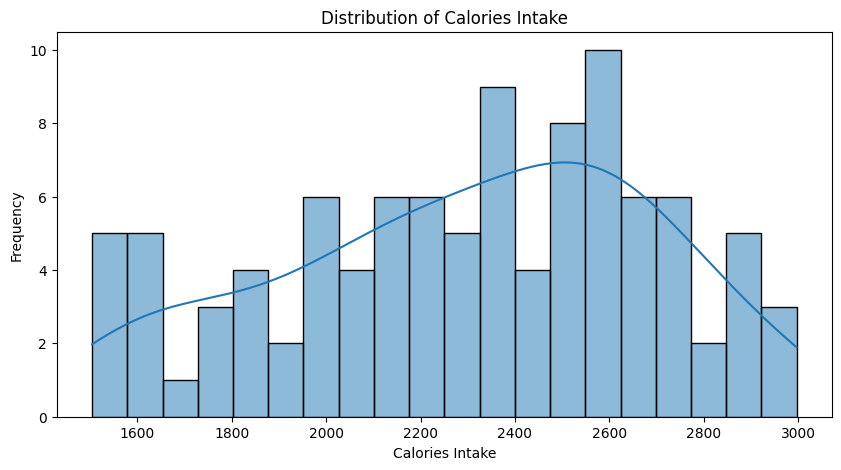

In [8]:
# Step 2: Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(df['Calories Intake'], bins=20, kde=True)
plt.title('Distribution of Calories Intake')
plt.xlabel('Calories Intake')
plt.ylabel('Frequency')
plt.show()


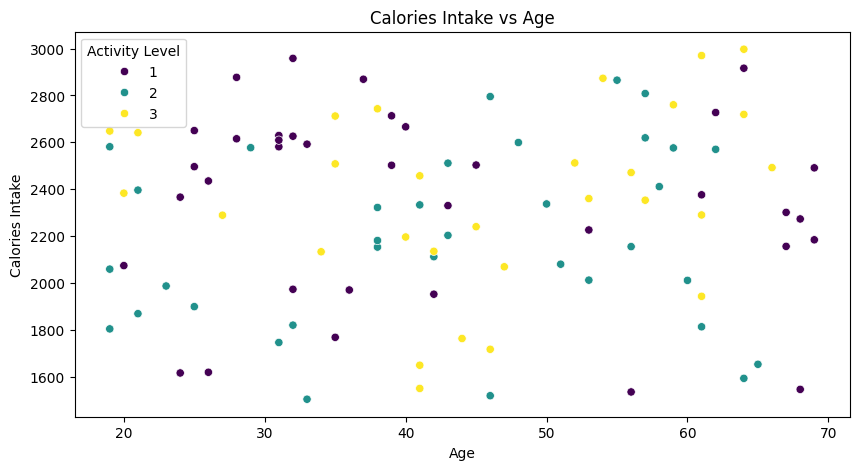

In [9]:
# Visualize relationships between features and target
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Calories Intake', hue='Activity Level', palette='viridis')
plt.title('Calories Intake vs Age')
plt.xlabel('Age')
plt.ylabel('Calories Intake')
plt.show()

In [10]:
# Step 3: Data Preprocessing
# Check for missing values
print(df.isnull().sum())

User ID                0
Age                    0
Weight                 0
Dietary Preferences    0
Activity Level         0
Calories Intake        0
dtype: int64


In [11]:
df = pd.get_dummies(df, columns=['Activity Level'], drop_first=True)

In [12]:
X = df[['Age'] + [col for col in df.columns if 'Activity Level' in col]]
y = df['Calories Intake']

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Step 6: Train Models
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Dictionary to hold evaluation results
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R^2': r2
    }



In [14]:
# Step 7: Display the Evaluation Results
results_df = pd.DataFrame(results).T
print(results_df)

                                    MAE            MSE       R^2
Linear Regression            333.039654  168997.774509 -0.062874
Random Forest Regressor      424.055901  243843.903803 -0.533602
Gradient Boosting Regressor  432.759437  272342.237556 -0.712836
